### This script entitled to output the box plot of the pattern correlation of the simulation and observations, overlapped with the MMEM, SMILE ensemble pattern versus observations

In [2]:
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [3]:
import src.Statistics_function as stat_functions

In [4]:
def read_flat_correlation(file_path):
    values = []
    with open(file_path, 'r') as file:
        for line in file:
            if line.lower().startswith('run') or not line.strip():
                continue
            try:
                _, value = line.strip().split()
                values.append(float(value))
            except ValueError:
                continue
    return values

In [5]:
# input the pattern correlation of each models: single realization and the ensemble mean
dir_in = '/work/mh0033/m301036/Land_surf_temp/Disentangling_OBS_SAT_trend/Revision_check/pseudo_obs_check/data/correlation/'

In [6]:
CanESM5_run_ens_corr = read_flat_correlation(dir_in + 'CanESM5_correlation_with_ensemble.txt')
IPSL_run_ens_corr = read_flat_correlation(dir_in + 'IPSL_CM6A_correlation_with_ensemble.txt')
EC_Earth_run_ens_corr = read_flat_correlation(dir_in + 'EC_Earth_correlation_with_ensemble.txt')
ACCESS_run_ens_corr = read_flat_correlation(dir_in + 'ACCESS_correlation_with_ensemble.txt')
MIROC6_run_ens_corr = read_flat_correlation(dir_in + 'MIROC6_correlation_with_ensemble.txt')
MMEM_run_ens_corr = read_flat_correlation(dir_in + 'MMEM_correlation_with_ensemble.txt')

In [7]:
CanESM5_run_ens_corr

[0.9345,
 0.9062,
 0.9118,
 0.9487,
 0.9354,
 0.9457,
 0.9408,
 0.9234,
 0.942,
 0.9457,
 0.9593,
 0.9142,
 0.9086,
 0.9429,
 0.8891,
 0.9503,
 0.9069,
 0.9283,
 0.9498,
 0.9381,
 0.8834,
 0.9315,
 0.9449,
 0.9254,
 0.9343,
 0.9206,
 0.94,
 0.9369,
 0.9251,
 0.9479,
 0.945,
 0.8906,
 0.9212,
 0.9296,
 0.9285,
 0.9288,
 0.9399,
 0.9088,
 0.9468,
 0.9361,
 0.9363,
 0.9022,
 0.8896,
 0.9531,
 0.9099,
 0.9501,
 0.8677,
 0.8869,
 0.9477,
 0.8943]

In [8]:
MPI_ESM_data = {
    'CanESM5': CanESM5_run_ens_corr,
    'IPSL-CM6A-LR': IPSL_run_ens_corr,
    'EC-Earth3': EC_Earth_run_ens_corr,
    'ACCESS-ESM1.5': ACCESS_run_ens_corr,
    'MIROC6': MIROC6_run_ens_corr,
    'MMLE': MMEM_run_ens_corr
}

In [9]:
MPI_ESM_data

{'CanESM5': [0.9345,
  0.9062,
  0.9118,
  0.9487,
  0.9354,
  0.9457,
  0.9408,
  0.9234,
  0.942,
  0.9457,
  0.9593,
  0.9142,
  0.9086,
  0.9429,
  0.8891,
  0.9503,
  0.9069,
  0.9283,
  0.9498,
  0.9381,
  0.8834,
  0.9315,
  0.9449,
  0.9254,
  0.9343,
  0.9206,
  0.94,
  0.9369,
  0.9251,
  0.9479,
  0.945,
  0.8906,
  0.9212,
  0.9296,
  0.9285,
  0.9288,
  0.9399,
  0.9088,
  0.9468,
  0.9361,
  0.9363,
  0.9022,
  0.8896,
  0.9531,
  0.9099,
  0.9501,
  0.8677,
  0.8869,
  0.9477,
  0.8943],
 'IPSL-CM6A-LR': [0.9286,
  0.9024,
  0.9072,
  0.9457,
  0.9335,
  0.9435,
  0.9405,
  0.9211,
  0.9375,
  0.9427,
  0.9566,
  0.9063,
  0.9003,
  0.938,
  0.8957,
  0.9499,
  0.9053,
  0.9255,
  0.944,
  0.9368,
  0.8842,
  0.9269,
  0.9359,
  0.9273,
  0.9303,
  0.9169,
  0.938,
  0.9338,
  0.9226,
  0.9477,
  0.9435,
  0.8805,
  0.9129,
  0.9224,
  0.9234,
  0.9248,
  0.9346,
  0.9079,
  0.9479,
  0.9319,
  0.9353,
  0.8962,
  0.894,
  0.9484,
  0.9027,
  0.9491,
  0.8642,
  0.8763,


In [10]:
plt.rcParams['figure.figsize'] = (15, 12)
plt.rcParams['font.size']       = 16
# plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['axes.labelsize']  = 16
plt.rcParams['ytick.direction'] = 'out'
plt.rcParams['xtick.direction'] = 'out'
plt.rcParams['ytick.minor.visible'] = False
plt.rcParams['ytick.right']         = False
plt.rcParams['xtick.bottom']        = True
# set the ticker length
plt.rcParams['xtick.major.size']    = 8
plt.rcParams['xtick.major.width']   = 2.5
plt.rcParams['ytick.major.size']    = 8
plt.rcParams['ytick.major.width']   = 2.5
# set the frame width
plt.rcParams['axes.linewidth']      = 2.5
# set the legend
plt.rcParams['legend.fontsize']     = 16
plt.rcParams['legend.frameon']      = False
plt.rcParams['legend.handlelength'] = 0
plt.rcParams['savefig.transparent'] = True # save the figure with a transparent background
plt.rcParams['pdf.fonttype'] = 42 # embed the fonts in the pdf file
# x = np.arange(1850, 2015, 1)

In [11]:
unforced_CanESM5_run_obs_corr = read_flat_correlation(dir_in + 'CanESM5_ICV_std_correlation_with_ensemble.txt')
unforced_IPSL_run_obs_corr = read_flat_correlation(dir_in + 'IPSL_CM6A_ICV_std_correlation_with_ensemble.txt')
unforced_EC_Earth_run_obs_corr = read_flat_correlation(dir_in + 'EC_Earth_ICV_std_correlation_with_ensemble.txt')
unforced_ACCESS_run_obs_corr = read_flat_correlation(dir_in + 'ACCESS_ICV_std_correlation_with_ensemble.txt')
unforced_MIROC6_run_obs_corr = read_flat_correlation(dir_in + 'MIROC6_ICV_std_correlation_with_ensemble.txt')

In [12]:
unforced_MMEM_run_obs_corr = read_flat_correlation(dir_in + 'MMEM_ICV_std_correlation_with_ensemble.txt')
unforced_MMEM_run_obs_corr

[0.9247,
 0.9396,
 0.9273,
 0.8605,
 0.9366,
 0.9218,
 0.9067,
 0.9249,
 0.9291,
 0.9144,
 0.9137,
 0.8831,
 0.9304,
 0.9196,
 0.9006,
 0.9175,
 0.9152,
 0.9014,
 0.9407,
 0.912,
 0.926,
 0.9348,
 0.9257,
 0.875,
 0.9286,
 0.922,
 0.9235,
 0.8734,
 0.9175,
 0.9065,
 0.9067,
 0.8914,
 0.9024,
 0.9187,
 0.9217,
 0.9089,
 0.9306,
 0.9185,
 0.9231,
 0.9166,
 0.9279,
 0.9238,
 0.9393,
 0.9011,
 0.9411,
 0.9079,
 0.9104,
 0.9053,
 0.9359,
 0.8825]

In [13]:
unforced_MIROC6_run_obs_corr

[0.9231,
 0.9361,
 0.9313,
 0.8668,
 0.936,
 0.9185,
 0.9089,
 0.9238,
 0.9335,
 0.9167,
 0.9157,
 0.88,
 0.9285,
 0.9159,
 0.8932,
 0.9118,
 0.9168,
 0.9001,
 0.9399,
 0.9099,
 0.9251,
 0.9337,
 0.9235,
 0.8719,
 0.9303,
 0.9219,
 0.926,
 0.8722,
 0.9159,
 0.9092,
 0.9044,
 0.8844,
 0.9039,
 0.9165,
 0.9211,
 0.9095,
 0.9297,
 0.9183,
 0.9225,
 0.9181,
 0.9228,
 0.9231,
 0.9384,
 0.8983,
 0.941,
 0.901,
 0.9066,
 0.91,
 0.9362,
 0.8844]

In [14]:
MPI_ESM_unforced_data = {
    'CanESM5': unforced_CanESM5_run_obs_corr,
    'IPSL-CM6A-LR': unforced_IPSL_run_obs_corr,
    'EC-Earth3': unforced_EC_Earth_run_obs_corr,
    'ACCESS-ESM1.5': unforced_ACCESS_run_obs_corr,
    'MIROC6': unforced_MIROC6_run_obs_corr,
    'MMLE': unforced_MMEM_run_obs_corr
}

### load the MMEM pattern correlations

### No-longer needed which is ICV in fig.2

In [15]:
# import warnings
# warnings.filterwarnings("ignore")

# # input pattern correlation:
# def read_correlations(file_path):
#     correlations = {
#         '10-year': [],
#         '30-year': [],
#         '60-year': []
#     }
    
#     current_period = '10-year'  # Initialize with the first period

#     with open(file_path, 'r') as file:
#         for line in file:
#             try:
#                 # Try to convert the line into a float and add it to the current period list
#                 correlations[current_period].append(float(line.strip()))
#             except ValueError:
#                 # If it fails, it's probably a header line; update the current period based on the header
#                 if '10-year' in line:
#                     current_period = '10-year'
#                 elif '30-year' in line:
#                     current_period = '30-year'
#                 elif '60-year' in line:
#                     current_period = '60-year'
#                 # If it's not a header, the line is skipped

#     return correlations

# # input the pattern correlation of each models: single realization and the ensemble mean
# dir_in = '/work/mh0033/m301036/Land_surf_temp/Disentangling_OBS_SAT_trend/Figure2/'

# CanESM5_run_ENS_correlation = read_correlations(dir_in + 'CanESM5/pattern_correlations.txt')
# IPSL_run_ENS_correlation = read_correlations(dir_in + 'IPSL/pattern_correlations.txt')
# EC_Earth_run_ENS_correlation = read_correlations(dir_in + 'EC_Earth/pattern_correlations.txt')
# ACCESS_run_ENS_correlation = read_correlations(dir_in + 'ACCESS/pattern_correlations.txt')
# MPI_ESM_run_ENS_correlation = read_correlations(dir_in + 'MPI_ESM/pattern_correlations.txt')
# MIROC6_run_ENS_correlation = read_correlations(dir_in + 'MIROC6/pattern_correlations.txt')
# # In[4]:
# MMEM_corr = {'10-year': [0.82], '30-year': [0.86], '60-year': [0.87]}
# # %%
# unforced_CanESM5_run_ENS_correlation = read_correlations(dir_in + 'CanESM5/pattern_correlations_unforced_STD.txt')
# unforced_IPSL_run_ENS_correlation = read_correlations(dir_in + 'IPSL/pattern_correlations_unforced_STD.txt')
# unforced_EC_Earth_run_ENS_correlation = read_correlations(dir_in + 'EC_Earth/pattern_correlations_unforced_STD.txt')
# unforced_ACCESS_run_ENS_correlation = read_correlations(dir_in + 'ACCESS/pattern_correlations_unforced_STD.txt')
# unforced_MPI_ESM_run_ENS_correlation = read_correlations(dir_in + 'MPI_ESM/pattern_correlations_unforced_STD.txt')
# unforced_MIROC6_run_ENS_correlation = read_correlations(dir_in + 'MIROC6/pattern_correlations_unforced_STD.txt')
# # %%
# models_data = {
#     'CanESM5': CanESM5_run_ENS_correlation,
#     'IPSL-CM6A-LR': IPSL_run_ENS_correlation,
#     'EC-Earth3': EC_Earth_run_ENS_correlation,
#     'ACCESS-ESM1.5': ACCESS_run_ENS_correlation,
#     'MPI-ESM1.2-LR': MPI_ESM_run_ENS_correlation,
#     'MIROC6': MIROC6_run_ENS_correlation
# }

# models_unforced_data = {
#     'CanESM5': unforced_CanESM5_run_ENS_correlation,
#     'IPSL-CM6A-LR': unforced_IPSL_run_ENS_correlation,
#     'EC-Earth3': unforced_EC_Earth_run_ENS_correlation,
#     'ACCESS-ESM1.5': unforced_ACCESS_run_ENS_correlation,
#     'MPI-ESM1.2-LR': unforced_MPI_ESM_run_ENS_correlation,
#     'MIROC6': unforced_MIROC6_run_ENS_correlation,
# }

# # %%
# long_data = []

# # Loop through the dictionary and append each data point as a row in the list
# for model, correlations_dict in models_data.items():
#     for time_period, correlations in correlations_dict.items():
#         for correlation in correlations:
#             long_data.append({
#                 'Model': model,
#                 'Time Period': time_period,
#                 'Correlation': correlation
#             })

# # Convert the list to a DataFrame
# long_df = pd.DataFrame(long_data)
# # %%
# ICV_long_data = []

# # Loop through the dictionary and append each data point as a row in the list
# for model, correlations_dict in models_unforced_data.items():
#     for time_period, correlations in correlations_dict.items():
#         for correlation in correlations:
#             ICV_long_data.append({
#                 'Model': model,
#                 'Time Period': time_period,
#                 'Correlation': correlation
#             })
        
# # Convert the list to a DataFrame
# ICV_long_df = pd.DataFrame(ICV_long_data)

### Plotting pdf with MMEM & Do signifcant test for the pdf difference

In [16]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# from matplotlib.lines import Line2D

# # Color scheme and time segments
# RGB_dict = {'CanESM5':np.array([50, 34, 136])/255., 
#             'IPSL-CM6A-LR':np.array([68, 170, 152])/255., 
#             'EC-Earth3':np.array([221, 204, 118])/255., 
#             'ACCESS-ESM1.5':np.array([204, 101, 119])/255.,
#             'MIROC6':np.array([136, 33, 85])/255.}
# models_position = ['MIROC6', 'ACCESS-ESM1.5', 'EC-Earth3', 'IPSL-CM6A-LR', 'CanESM5']

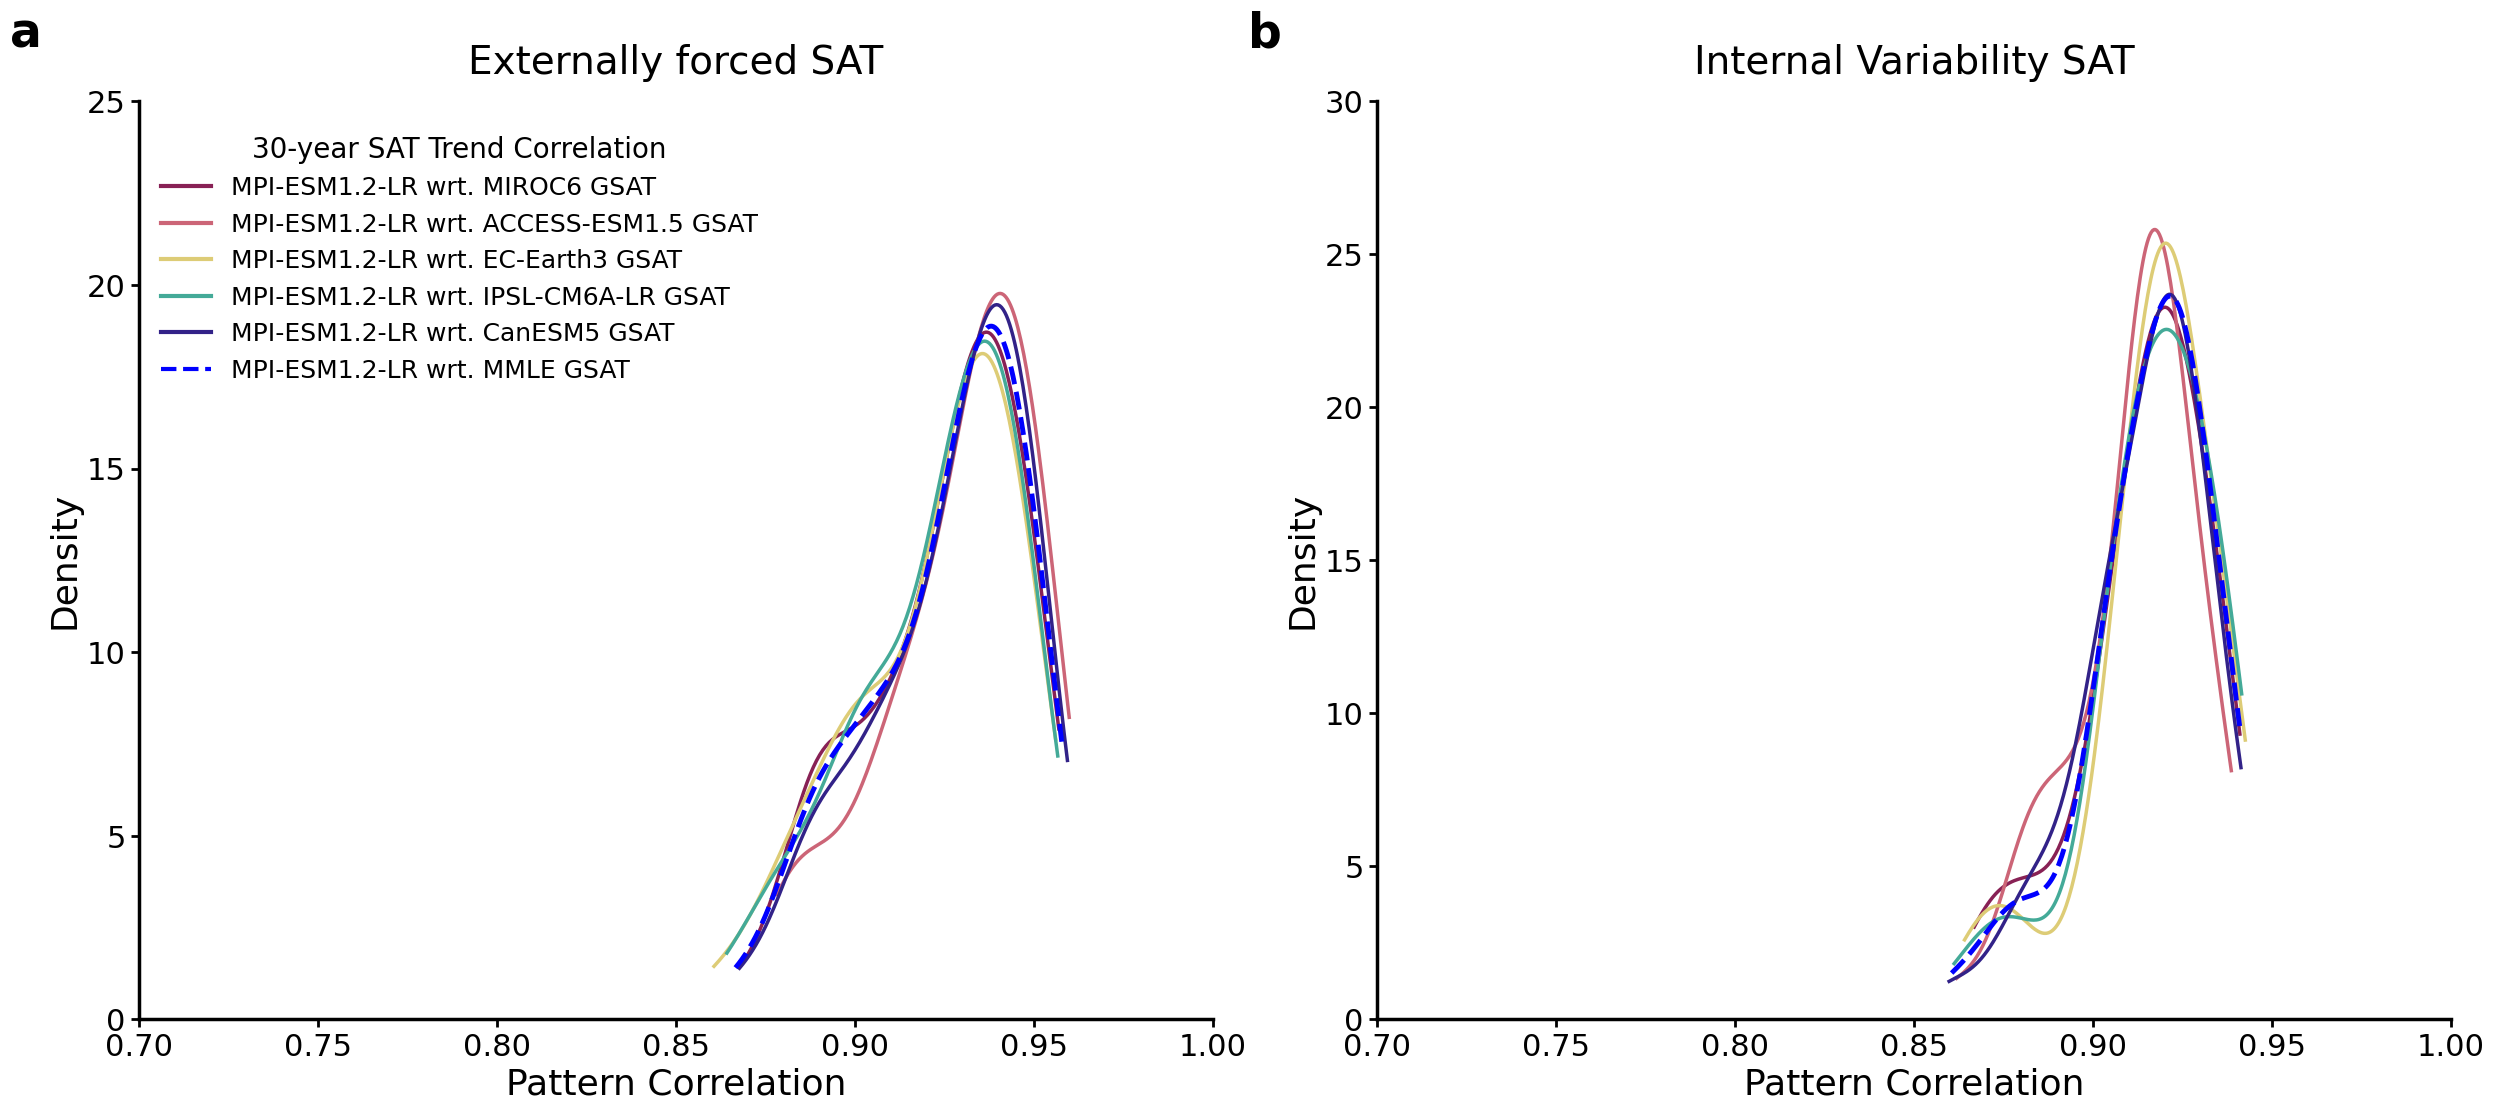

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.lines import Line2D

# === Define consistent model names and colors ===
models_position = ['MIROC6', 'ACCESS-ESM1.5', 'EC-Earth3', 'IPSL-CM6A-LR', 'CanESM5', 'MMLE']
RGB_dict = {
    'CanESM5': np.array([50, 34, 136])/255., 
    'IPSL-CM6A-LR': np.array([68, 170, 152])/255., 
    'EC-Earth3': np.array([221, 204, 118])/255., 
    'ACCESS-ESM1.5': np.array([204, 101, 119])/255.,
    'MIROC6': np.array([136, 33, 85])/255.,
    'MMLE': np.array([0, 0, 255])/255.  # MMLE color
}

# === Create figure ===
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(25, 12))
plt.subplots_adjust(hspace=0.3, wspace=0.2)

# === LEFT: External forced SAT ===
for model in models_position:
    segment_data = MPI_ESM_data[model]

    if model == 'MMLE':
        # Plot MMLE as dashed blue line only once
        sns.kdeplot(
            segment_data,
            label='',
            fill=False,
            linewidth=3.5,
            linestyle='--',
            color='blue',
            ax=axs[0],
            cut=0,
            bw_adjust=1.0,
            clip=(0.7, 1)
        )
    else:
        # Plot all other models as solid lines
        sns.kdeplot(
            segment_data,
            label=model,
            fill=False,
            linewidth=2.5,
            color=RGB_dict[model],
            ax=axs[0],
            cut=0,
            bw_adjust=1.0,
            clip=(0.7, 1)
        )


axs[0].set_title("Externally forced SAT", fontsize=28, pad=20)
axs[0].set_xlim(0.7, 1.0)
axs[0].set_ylim(0, 25)
axs[0].set_xlabel("Pattern Correlation", fontsize=26)
axs[0].set_ylabel("Density", fontsize=26)
axs[0].spines['top'].set_visible(False)
axs[0].spines['right'].set_visible(False)
axs[0].tick_params(axis='both', labelsize=22, direction='out', length=6, width=2)
axs[0].text(-0.12, 1.1, "a", transform=axs[0].transAxes, fontsize=34, fontweight='bold', va='top')
# === RIGHT: Internal Variability SAT ===
for model in models_position:
    segment_data = MPI_ESM_unforced_data[model]

    if model == 'MMLE':
        sns.kdeplot(
            segment_data,
            label='',
            fill=False,
            linewidth=3.5,
            linestyle='--',
            color='blue',
            ax=axs[1],
            cut=0,
            bw_adjust=1.0,
            clip=(0.7, 1)
        )
    else:
        sns.kdeplot(
            segment_data,
            label=model,
            fill=False,
            linewidth=2.5,
            color=RGB_dict[model],
            ax=axs[1],
            cut=0,
            bw_adjust=1.0,
            clip=(0.7, 1)
        )


axs[1].set_title("Internal Variability SAT", fontsize=28, pad=20)
axs[1].set_xlim(0.7, 1.0)
axs[1].set_ylim(0, 30)
axs[1].set_xlabel("Pattern Correlation", fontsize=26)
axs[1].set_ylabel("Density", fontsize=26)
axs[1].spines['top'].set_visible(False)
axs[1].spines['right'].set_visible(False)
axs[1].tick_params(axis='both', labelsize=22, direction='out', length=6, width=2)
axs[1].text(-0.12, 1.1, "b", transform=axs[1].transAxes, fontsize=34, fontweight='bold', va='top')

# === Unified Legend ===
custom_legend = [
    Line2D([0], [0], color=RGB_dict[model], lw=3, linestyle='-',
           label=f"MPI-ESM1.2-LR wrt. {model} GSAT")
    for model in models_position if model != 'MMLE'
] + [
    Line2D([0], [0], color='blue', lw=3, linestyle='--',
           label='MPI-ESM1.2-LR wrt. MMLE GSAT')
]
# axs[0].legend(handles=custom_legend, fontsize=14, loc='upper left')

fig.legend(
    handles=custom_legend,
    loc='lower center',
    fontsize=18,
    title="30-year SAT Trend Correlation",
    title_fontsize=20,
    ncol=1,
    bbox_to_anchor=(0.18, 0.65),
    frameon=False,
    handlelength=2  # Set to a value greater than 0
)
# from scipy.stats import ks_2samp

# # === Perform KS Test model versus MMLE ===
# # for forced SAT
# segment_MMLE = MPI_ESM_data['MMLE']
# # for ICV SAT
# segment_MMLE_ICV = MPI_ESM_unforced_data['MMLE']
# # Perform KS test for each model against MMLE
# significance_results = {}
# for model in models_position:
#     segment_data = MPI_ESM_data[model]
#     if model == 'MMLE':
#         continue
#     # Perform KS test
#     ks_stat, p_value = ks_2samp(segment_MMLE, segment_data)
#     significance_results[model] = p_value

# # === Add p-values to the plot ===
# for i, model in enumerate([m for m in models_position if m != 'MMLE']):
#     p_value = significance_results[model]
#     axs[0].text(
#         0.95, 28 - i * 2,
#         f"{model}: p={p_value:.3f}",
#         fontsize=14,
#         color=RGB_dict[model]
#     )

# # Add MMLE label
# axs[0].text(
#     0.95, 28 - len([m for m in models_position if m != 'MMLE']) * 2,
#     "MMLE: Reference",
#     fontsize=14,
#     color='blue'
# )

# # Add ICV p-values
# significance_results_ICV = {}
# for model in models_position:
#     if model == 'MMLE':
#         continue
#     segment_data_ICV = MPI_ESM_unforced_data[model]
#     # Perform KS test
#     ks_stat_ICV, p_value_ICV = ks_2samp(segment_MMLE_ICV, segment_data_ICV)
#     significance_results_ICV[model] = p_value_ICV
# # === Add p-values to the plot ===
# for i, model in enumerate([m for m in models_position if m != 'MMLE']):
#     p_value = significance_results_ICV[model]
#     axs[1].text(
#         0.95, 28 - i * 2,
#         f"{model}: p={p_value:.3f}",
#         fontsize=14,
#         color=RGB_dict[model]
#     )

# # Add MMLE ICV label
# axs[1].text(
#     0.95, 28 - len([m for m in models_position if m != 'MMLE']) * 2,
#     "MMLE: Reference",
#     fontsize=14,
#     color='blue'
# )

# === Final Layout ===
plt.tight_layout(rect=[0, 0.05, 1, 1])
plt.savefig('Method_robust_test_Fig3_Extend.pdf', dpi=300, bbox_inches='tight')
plt.savefig('Method_robust_test_Fig3_Extend.png', dpi=300, bbox_inches='tight')
plt.show()